# Installing relevant libraries

In this project, we will be using the following libraries.

In [1]:
!pip install mplleaflet
!pip install wordcloud
!pip install nltk

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import mplleaflet
sb.set()

In [3]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,words
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download("words")
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

True

# Problem Statement

The objective of this assignment is to find variables that has significant impact on the price. Hypotheses will constantly be tested to try to attain feasible results. 

There are 3 different csv files available from kaggle. In this portion they are read into pandas dataframe format. 

In [5]:
calendar_data= pd.read_csv("calendar.csv")
calendar_data.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
listings_data=pd.read_csv("listings.csv")
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
reviews_data=pd.read_csv("reviews.csv")
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


As seen above, the relevant information is consolodidated into listings_data. We will be using this dataset. 

In [8]:
listings_data.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

### Data Cleaning

The price data in the dataframe is an object type. We require this to be a float as it is a numeric variables. Therefore, the data is manipulated into a numeric form to be used later. 

In [9]:
listings_data['price'] = listings_data['price'].astype(str)
listings_data['price'] = listings_data['price'].str.replace("[$, ]", "").astype("float")

In [10]:
listings_data.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

### EDA

We begin by conducting a visualisation of the distribution of the price using a distplot. As seen from the plot below, the median is centred around $100. 

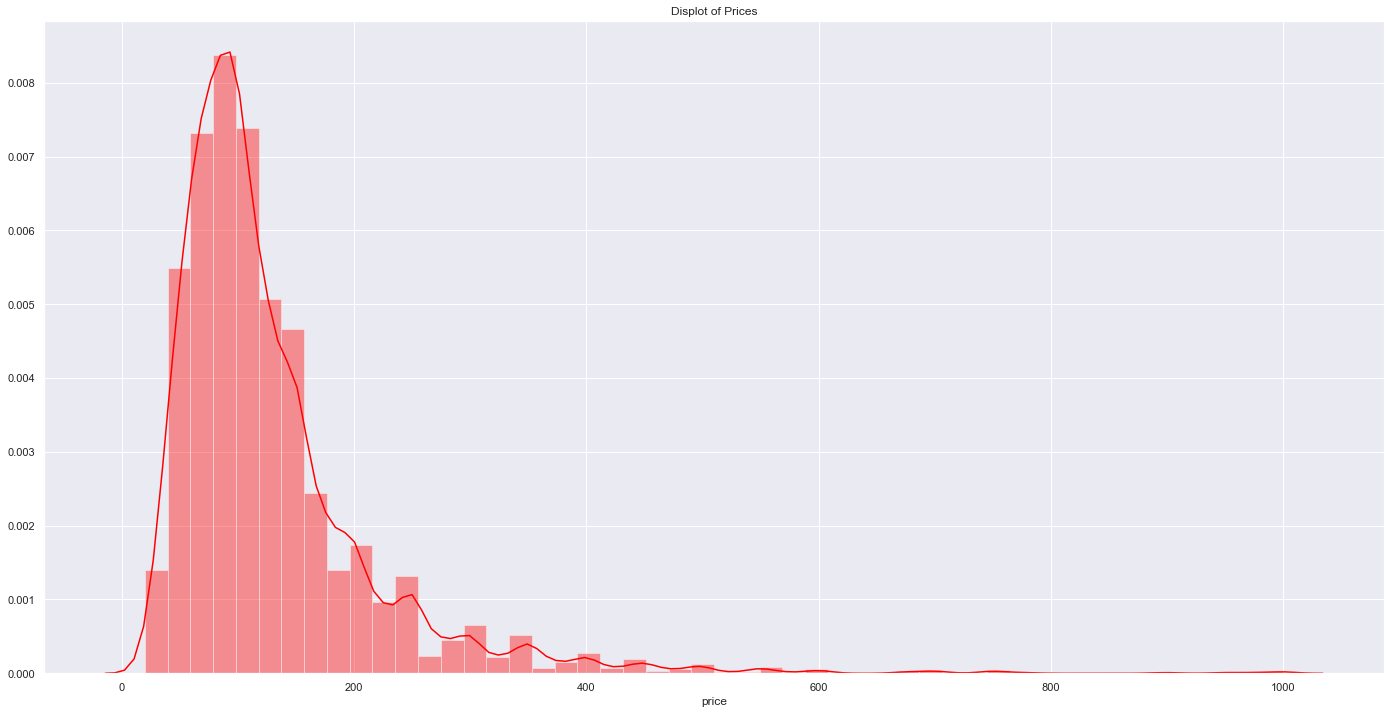

In [11]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(listings_data.price, kde = True, color = "red").set_title("Displot of Prices")
plt.show()

In [12]:
listings_data.price.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

The data shown has a 3818 data points with median at 100 and mean at 127.  

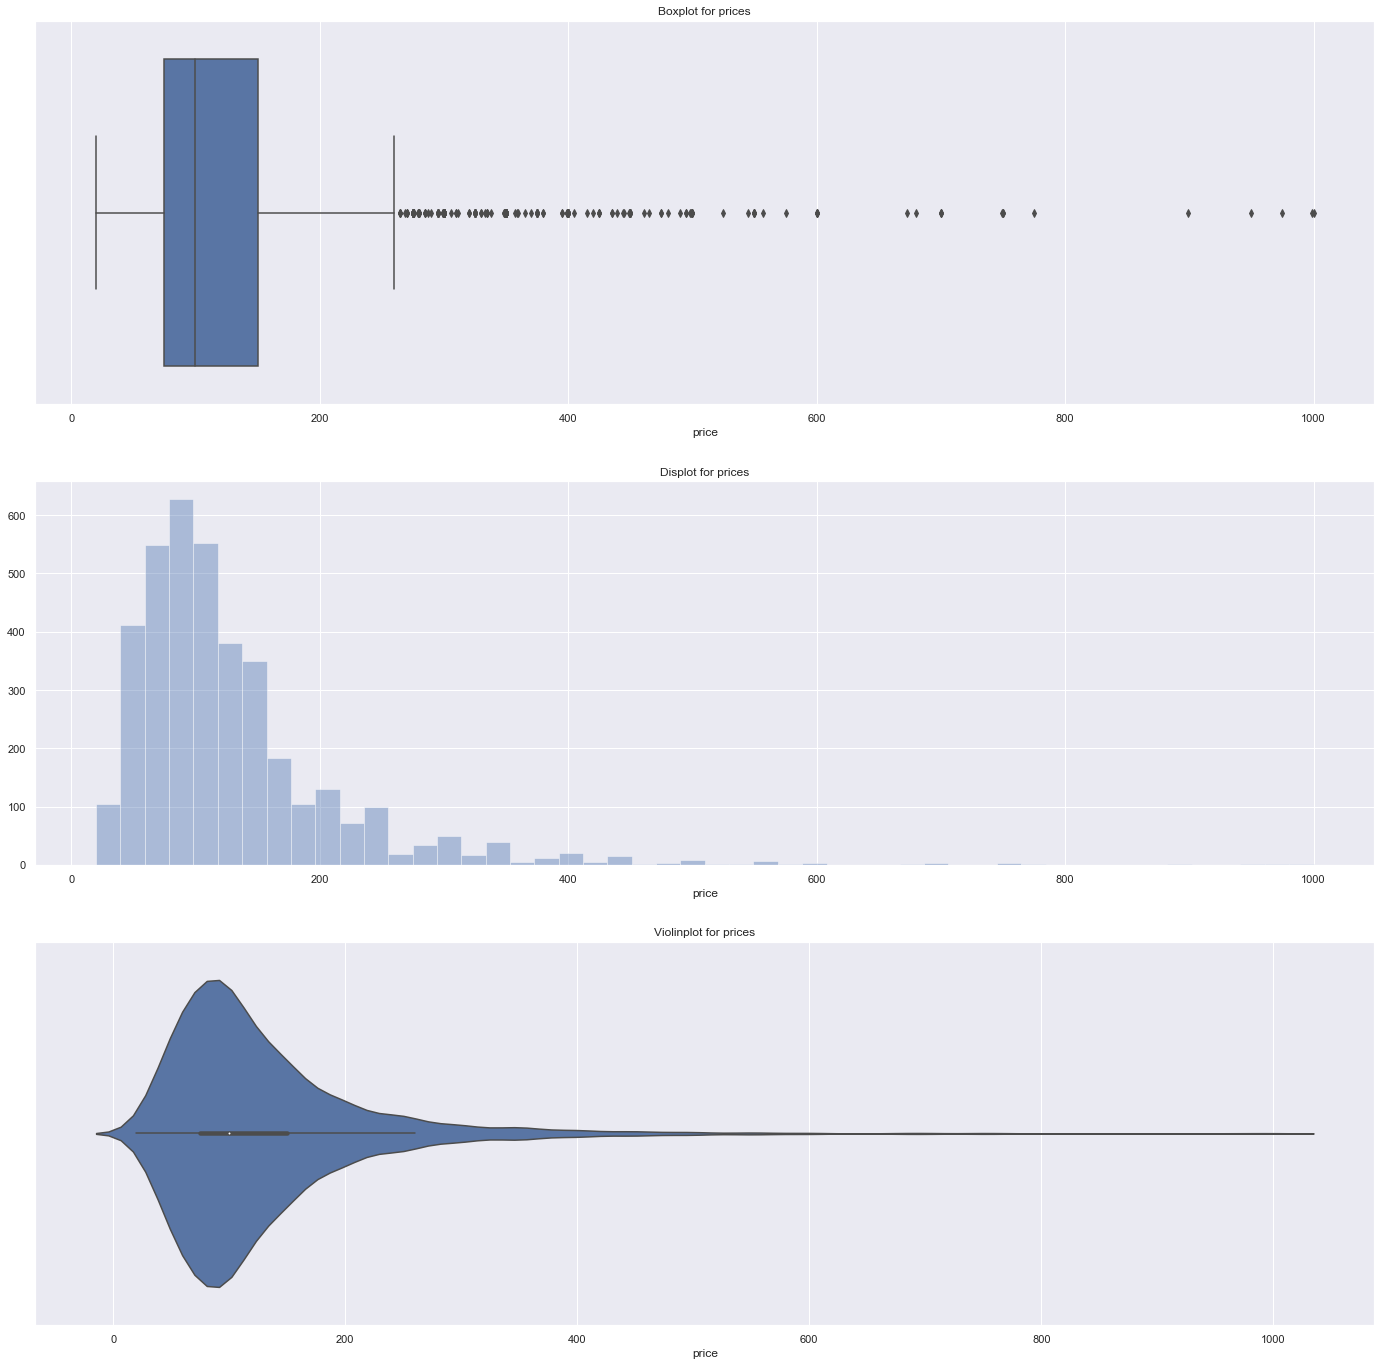

In [13]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(24, 24))
sb.set_style("whitegrid")
#Plotting boxplot,distplot and violinplot
ax1=sb.boxplot(listings_data.price, orient = "h", ax = axes[0]).set_title("Boxplot for prices")
ax2=sb.distplot(listings_data.price, kde = False, ax = axes[1]).set_title("Displot for prices")
ax3=sb.violinplot(listings_data.price, ax = axes[2]).set_title("Violinplot for prices")
plt.show()

The boxplot enables us to see that there are many outliers in the price. One can assume that these are luxury houses that are being rented out at a premium. 

In [14]:
first_quartile=listings_data.price.quantile(.25)
median=listings_data.price.quantile(.50)
third_quartile=listings_data.price.quantile(.75)
iqr=third_quartile-first_quartile
print("First Quartile: \t"+str(first_quartile))
print("Third Quartile: \t"+str(third_quartile))
print("Interquartile Range: \t"+str(iqr))
print("Median:              \t"+str(median))

First Quartile: 	75.0
Third Quartile: 	150.0
Interquartile Range: 	75.0
Median:              	100.0


By determining the interquartile range, we can determine which values are outliers by checking if they are with the interquartile range. 

The plots as shown above has most prices of the AirBnB apartments are priced between the range of 75  and  150

---
# Visualize Location (START)

In this portion, we are going to visualise the locations of each airbnb apartment using a scatterplot and the library, mplleaflet.

In [15]:
listings_data["monthly_price"]
sb.set()

We get the relevant information from the main dataframe. 

In [16]:
location_data=pd.DataFrame(listings_data[["id","latitude","longitude"]])

In [17]:
location_data.head()

,id,latitude,longitude
0,241032,47.636289,-122.371025
1,953595,47.639123,-122.365666
2,3308979,47.629724,-122.369483
3,7421966,47.638473,-122.369279
4,278830,47.632918,-122.372471


A function is written to visualise the location of each apartment. Another tab on the browser should appear with the map and the data points on the map. If the map does not appear in your web browser. Please do not hesitate to contact us. 

In [18]:
def visualise_listings(data):
    
    longitude=[]
    latitude=[]
        
    for items in data["longitude"]:
        longitude.append(items)
    for items in data["latitude"]:
        latitude.append(items)
    plt.scatter(longitude,latitude)
    
    return mplleaflet.show()

visualise_listings(location_data)

# Clustering the data, based on location

In this portion, we aim to conduct k-means clustering on the location of each airbnb apartment. Through this, we can infer for patterns in the map.

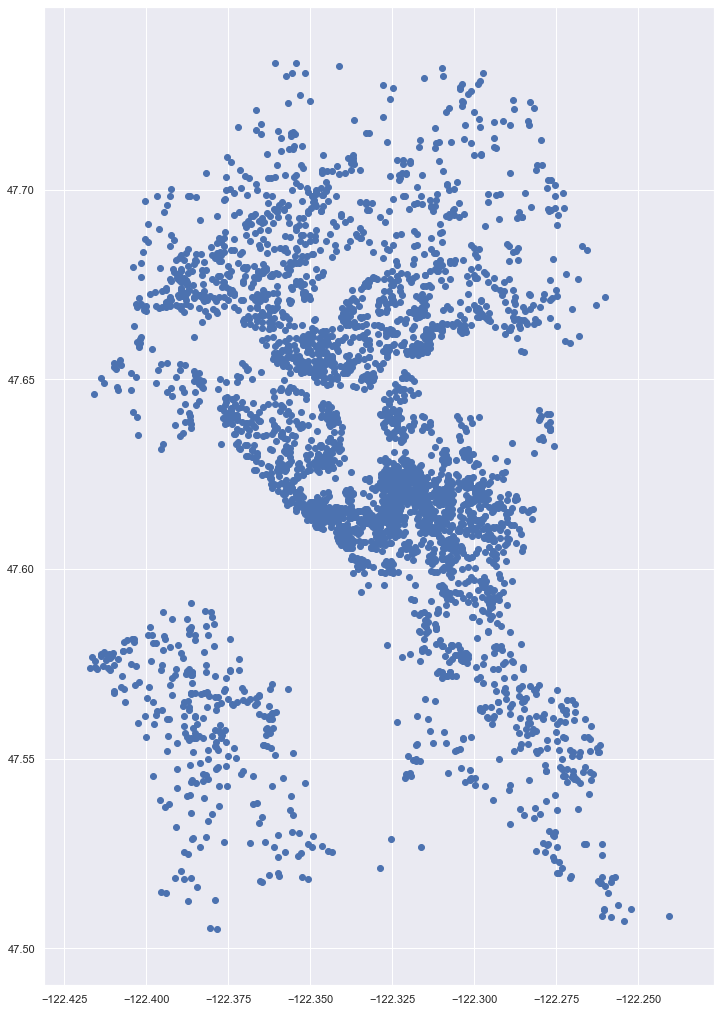

In [19]:
f, axes = plt.subplots(1, 1, figsize = (12, 18))

def visualise_listings(data):
    
    longitude=[]
    latitude=[]
        
    for items in data["longitude"]:
        longitude.append(items)
    for items in data["latitude"]:
        latitude.append(items)
    return plt.scatter(longitude,latitude)

visualise_listings(location_data)

In [20]:
listings_data['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

Using the elbow method, we determine the optimal number of clusters we impose on the clustering. 

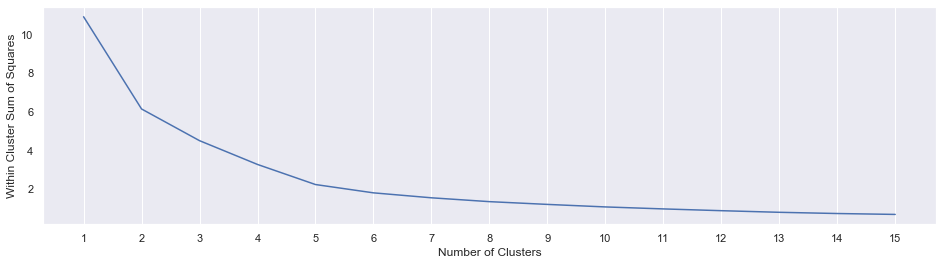

In [21]:
from sklearn.cluster import KMeans

loc_price_data = pd.DataFrame(listings_data[["longitude", "latitude", "price", "beds"]])
X = pd.DataFrame(listings_data[["longitude", "latitude"]])

min_clust = 1
max_clust = 15

within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Based on the elbow method, we have selected 6 clusters as the graph approaches more than 6 clusters, it begins to flatten out. 

In [22]:
num_clust = 6
kmeans = KMeans(n_clusters = num_clust)
kmeans.fit(X)

kmeans.cluster_centers_

array([[-122.38253133,   47.55760628],
       [-122.31608114,   47.614154  ],
       [-122.37124521,   47.67959975],
       [-122.28723242,   47.55561356],
       [-122.3115661 ,   47.67868945],
       [-122.35003344,   47.63530738]])

After the prediction on the dataset, we use a countplot to visualise the amount of data in each cluster.

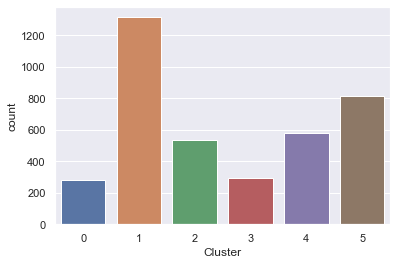

In [23]:
labels = kmeans.predict(X)

X_labeled = loc_price_data.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

sb.countplot(X_labeled["Cluster"])

Running the next portion of the code will open another tab in the web browser. It will visualise the clustered datapoints in the map.

In [24]:
f, axes = plt.subplots(1, 1, figsize = (12, 18))
#plt.axes().set_facecolor("teal")

plt.scatter(data = X_labeled, x = "longitude", y = "latitude", c = "Cluster", cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c ='k', s = 300, marker = 'x')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustering of Data Points")
mplleaflet.show()

As seen from the scatter plot on the map, we can see that the K-means cluster has grouped the datapoints in terms of location.

# Predicting location(cluster) using its price.



As it is not a fair representation if we are using only the price, we adjust the price to per bed to have a more accurate representation of the price. 

In [25]:
for i in X_labeled:
    per_area = X_labeled["price"]/X_labeled["beds"]
    X_labeled["Price Per Bed"] = per_area

In [26]:
X_labeled

,longitude,latitude,price,beds,Cluster,Price Per Bed
0,-122.371025,47.636289,85.0,1.0,5,85.000000
1,-122.365666,47.639123,150.0,1.0,5,150.000000
2,-122.369483,47.629724,975.0,7.0,5,139.285714
3,-122.369279,47.638473,100.0,2.0,5,50.000000
4,-122.372471,47.632918,450.0,3.0,5,150.000000
...,...,...,...,...,...,...
3813,-122.359170,47.664295,359.0,3.0,2,119.666667
3814,-122.318309,47.649552,79.0,2.0,4,39.500000
3815,-122.240607,47.508453,93.0,1.0,3,93.000000
3816,-122.275530,47.632335,99.0,1.0,1,99.000000


In [27]:
cond=X_labeled['Cluster']==0
X_labeled[cond]["Price Per Bed"].describe()    

count    283.000000
mean      74.116103
std       45.064023
min       16.333333
25%       49.166667
50%       64.500000
75%       86.000000
max      399.000000
Name: Price Per Bed, dtype: float64

In [28]:
cond=X_labeled['Cluster']==1
X_labeled[cond]["Price Per Bed"].describe() 

count    1314.000000
mean       90.904836
std        49.745915
min         4.750000
25%        59.125000
50%        82.000000
75%       110.750000
max       999.000000
Name: Price Per Bed, dtype: float64

In [29]:
cond=X_labeled['Cluster']==2
X_labeled[cond]["Price Per Bed"].describe() 

count    537.000000
mean      69.933364
std       38.338111
min       11.750000
25%       47.500000
50%       63.333333
75%       86.000000
max      550.000000
Name: Price Per Bed, dtype: float64

In [30]:
cond=X_labeled['Cluster']==3
X_labeled[cond]["Price Per Bed"].describe() 

count    293.000000
mean      61.360621
std       25.327232
min       17.500000
25%       41.666667
50%       60.000000
75%       75.000000
max      187.500000
Name: Price Per Bed, dtype: float64

In [31]:
cond=X_labeled['Cluster']==4
X_labeled[cond]["Price Per Bed"].describe() 

count    578.000000
mean      68.292293
std       38.715414
min       14.500000
25%       45.000000
50%       60.000000
75%       85.000000
max      500.000000
Name: Price Per Bed, dtype: float64

In [32]:
cond=X_labeled['Cluster']==5
X_labeled[cond]["Price Per Bed"].describe() 

count    812.000000
mean      93.378011
std       45.108885
min       15.800000
25%       59.937500
50%       87.000000
75%      119.000000
max      316.666667
Name: Price Per Bed, dtype: float64

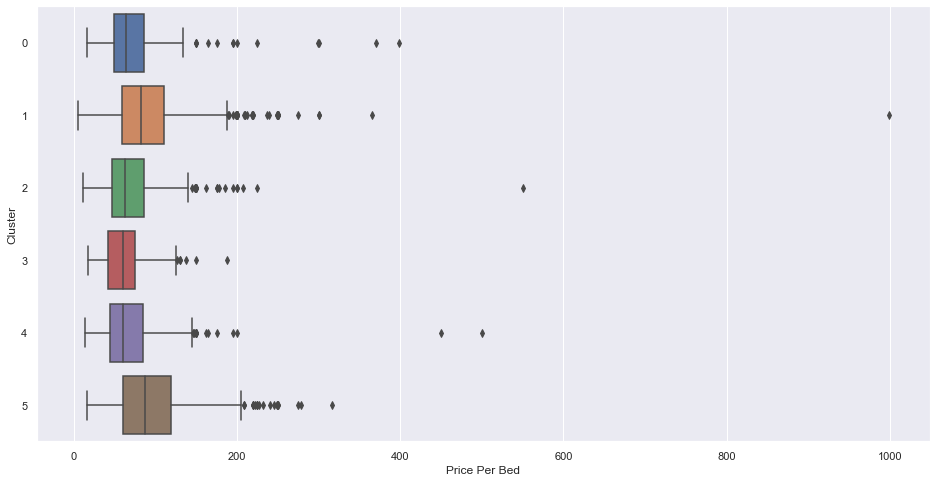

In [33]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = 'Price Per Bed', y = 'Cluster', data = X_labeled)

D:\New folder\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
D:\New folder\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


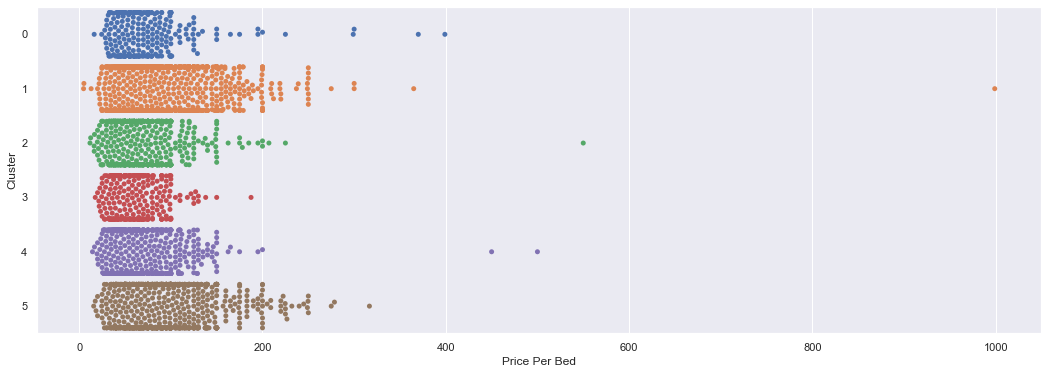

In [34]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = 'Price Per Bed', y = 'Cluster', data = X_labeled)

For the X_labeled dataframe, there is a Nan variable in the price per bed column. We remove it with dropna fucntion.

In [35]:
cond1=X_labeled["Price Per Bed"].isnull()==True
X_labeled[cond1]

,longitude,latitude,price,beds,Cluster,Price Per Bed
1961,-122.363442,47.698613,280.0,NaN,2,NaN


In [36]:
X_labeled=X_labeled.dropna()

In [37]:
X_labeled

,longitude,latitude,price,beds,Cluster,Price Per Bed
0,-122.371025,47.636289,85.0,1.0,5,85.000000
1,-122.365666,47.639123,150.0,1.0,5,150.000000
2,-122.369483,47.629724,975.0,7.0,5,139.285714
3,-122.369279,47.638473,100.0,2.0,5,50.000000
4,-122.372471,47.632918,450.0,3.0,5,150.000000
...,...,...,...,...,...,...
3813,-122.359170,47.664295,359.0,3.0,2,119.666667
3814,-122.318309,47.649552,79.0,2.0,4,39.500000
3815,-122.240607,47.508453,93.0,1.0,3,93.000000
3816,-122.275530,47.632335,99.0,1.0,1,99.000000


In [38]:
train, test = train_test_split(X_labeled, test_size=0.2)

In [39]:
X_labeled.dtypes

longitude         float64
latitude          float64
price             float64
beds              float64
Cluster          category
Price Per Bed     float64
dtype: object

In [40]:
from sklearn.tree import DecisionTreeClassifier

print("Train Set :", train.shape)
print("Test Set  :", test.shape)

X_train = pd.DataFrame(train['Price Per Bed'])
y_train = pd.DataFrame(train['Cluster'])

X_test = pd.DataFrame(test['Price Per Bed'])
y_test = pd.DataFrame(test['Cluster'])


Train Set : (3053, 6)
Test Set  : (764, 6)


In [41]:
for number in range(20):
    number+=1
    dectree = DecisionTreeClassifier(max_depth = number)
    dectree.fit(X_train, y_train)

    train_pred = dectree.predict(X_train)
    print("Depth of tree\t:",number)
    print("Training Classification Accuracy \t:", dectree.score(X_train, y_train))



Depth of tree	: 1
Training Classification Accuracy 	: 0.34588928922371437
Depth of tree	: 2
Training Classification Accuracy 	: 0.3570258761873567
Depth of tree	: 3
Training Classification Accuracy 	: 0.3570258761873567
Depth of tree	: 4
Training Classification Accuracy 	: 0.3609564362921716
Depth of tree	: 5
Training Classification Accuracy 	: 0.3635768096953816
Depth of tree	: 6
Training Classification Accuracy 	: 0.3737307566328202
Depth of tree	: 7
Training Classification Accuracy 	: 0.38159187684245005
Depth of tree	: 8
Training Classification Accuracy 	: 0.39043563707828366
Depth of tree	: 9
Training Classification Accuracy 	: 0.3986243039633148
Depth of tree	: 10
Training Classification Accuracy 	: 0.4061578774975434
Depth of tree	: 11
Training Classification Accuracy 	: 0.41467409105797576
Depth of tree	: 12
Training Classification Accuracy 	: 0.4228627579430069
Depth of tree	: 13
Training Classification Accuracy 	: 0.42744841139862433
Depth of tree	: 14
Training Classification

In [42]:
for number in range(20):
    number+=1
    dectree = DecisionTreeClassifier(max_depth = number)
    dectree.fit(X_train, y_train)
    test_pred = dectree.predict(X_test)
    print("Depth of tree\t:",number)
    print("Testing Classification Accuracy \t:", dectree.score(X_test, y_test))
    print(" ")

Depth of tree	: 1
Testing Classification Accuracy 	: 0.337696335078534
 
Depth of tree	: 2
Testing Classification Accuracy 	: 0.33507853403141363
 
Depth of tree	: 3
Testing Classification Accuracy 	: 0.33507853403141363
 
Depth of tree	: 4
Testing Classification Accuracy 	: 0.337696335078534
 
Depth of tree	: 5
Testing Classification Accuracy 	: 0.3337696335078534
 
Depth of tree	: 6
Testing Classification Accuracy 	: 0.3324607329842932
 
Depth of tree	: 7
Testing Classification Accuracy 	: 0.33638743455497383
 
Depth of tree	: 8
Testing Classification Accuracy 	: 0.3324607329842932
 
Depth of tree	: 9
Testing Classification Accuracy 	: 0.3337696335078534
 
Depth of tree	: 10
Testing Classification Accuracy 	: 0.3298429319371728
 
Depth of tree	: 11
Testing Classification Accuracy 	: 0.3285340314136126
 
Depth of tree	: 12
Testing Classification Accuracy 	: 0.3324607329842932
 
Depth of tree	: 13
Testing Classification Accuracy 	: 0.3298429319371728
 
Depth of tree	: 14
Testing Classi

As you can see from the max depth set, the depth of 2 is optimal for the test result. But the overall accuracy is significantly low. Therefore, it is important to be apprenhensive about the validity of the decision tree model for this application.

In [43]:
dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Classification Accuracy 	: 0.3570258761873567


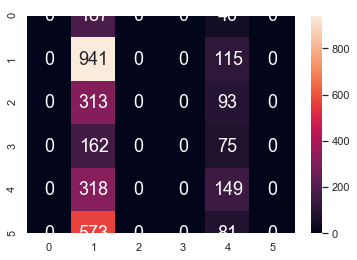

In [44]:
train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))


from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

From the confusion matrix, we see that the model does not predict any of the prices that are in cluster 0 to 3. This model is then considered unfeasible.

Classification Accuracy 	: 0.33507853403141363


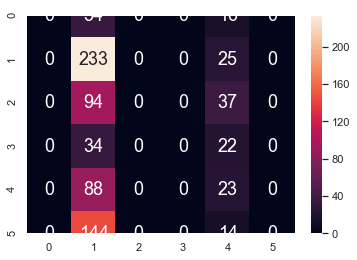

In [45]:
test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Characteristics of the property

In this portion, we look into what characteristics of the property predicts the price. Some variables for consideration are: 'property_type','room_type','accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet',"price". We then look at the correlation between the variables and the price to find which variable has the most impact in the determining the price.

In [46]:
room_data=pd.DataFrame(listings_data[['property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet',"price"]])

In [47]:
room_data.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price
0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0
1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0
2,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,975.0
3,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,100.0
4,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,450.0


We evaluate the types of data type to determine the numeric variables. 

In [48]:
room_data.dtypes

property_type     object
room_type         object
accommodates       int64
bathrooms        float64
bedrooms         float64
beds             float64
bed_type          object
amenities         object
square_feet      float64
price            float64
dtype: object

In [49]:
room_data.bed_type.unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [50]:
room_data.square_feet.unique()

array([     nan, 4.00e+02, 4.85e+02, 8.00e+02, 4.50e+02, 1.00e+00,
       1.80e+03, 3.00e+02, 5.00e+02, 6.00e+02, 2.10e+03, 1.00e+03,
       2.00e+03, 1.60e+03, 1.20e+03, 7.50e+02, 3.00e+03, 1.40e+02,
       9.50e+02, 9.00e+02, 3.00e+00, 8.50e+02, 1.30e+03, 1.15e+03,
       6.50e+02, 2.50e+02, 4.20e+02, 7.70e+02, 7.10e+02, 0.00e+00,
       1.40e+03, 2.75e+03, 2.00e+00, 1.10e+03, 1.20e+02, 5.50e+02,
       7.00e+02, 7.30e+02, 4.35e+02, 6.75e+02, 1.85e+03, 2.60e+03,
       1.83e+02, 2.00e+02, 1.70e+02, 3.40e+02, 3.50e+02, 6.60e+02])

In [51]:
room_data_numeric=pd.DataFrame(room_data[['accommodates', 'bathrooms', 'bedrooms','beds', 'square_feet',"price"]])

In [52]:
room_data_numeric.head()

,accommodates,bathrooms,bedrooms,beds,square_feet,price
0,4,1.0,1.0,1.0,NaN,85.0
1,4,1.0,1.0,1.0,NaN,150.0
2,11,4.5,5.0,7.0,NaN,975.0
3,3,1.0,0.0,2.0,NaN,100.0
4,6,2.0,3.0,3.0,NaN,450.0


              accommodates  bathrooms  bedrooms      beds  square_feet  \
accommodates      1.000000   0.538439  0.770974  0.861119     0.439057   
bathrooms         0.538439   1.000000  0.610937  0.532838     0.381094   
bedrooms          0.770974   0.610937  1.000000  0.753167     0.448786   
beds              0.861119   0.532838  0.753167  1.000000     0.312155   
square_feet       0.439057   0.381094  0.448786  0.312155     1.000000   
price             0.652218   0.516424  0.627720  0.589525     0.531752   

                 price  
accommodates  0.652218  
bathrooms     0.516424  
bedrooms      0.627720  
beds          0.589525  
square_feet   0.531752  
price         1.000000  


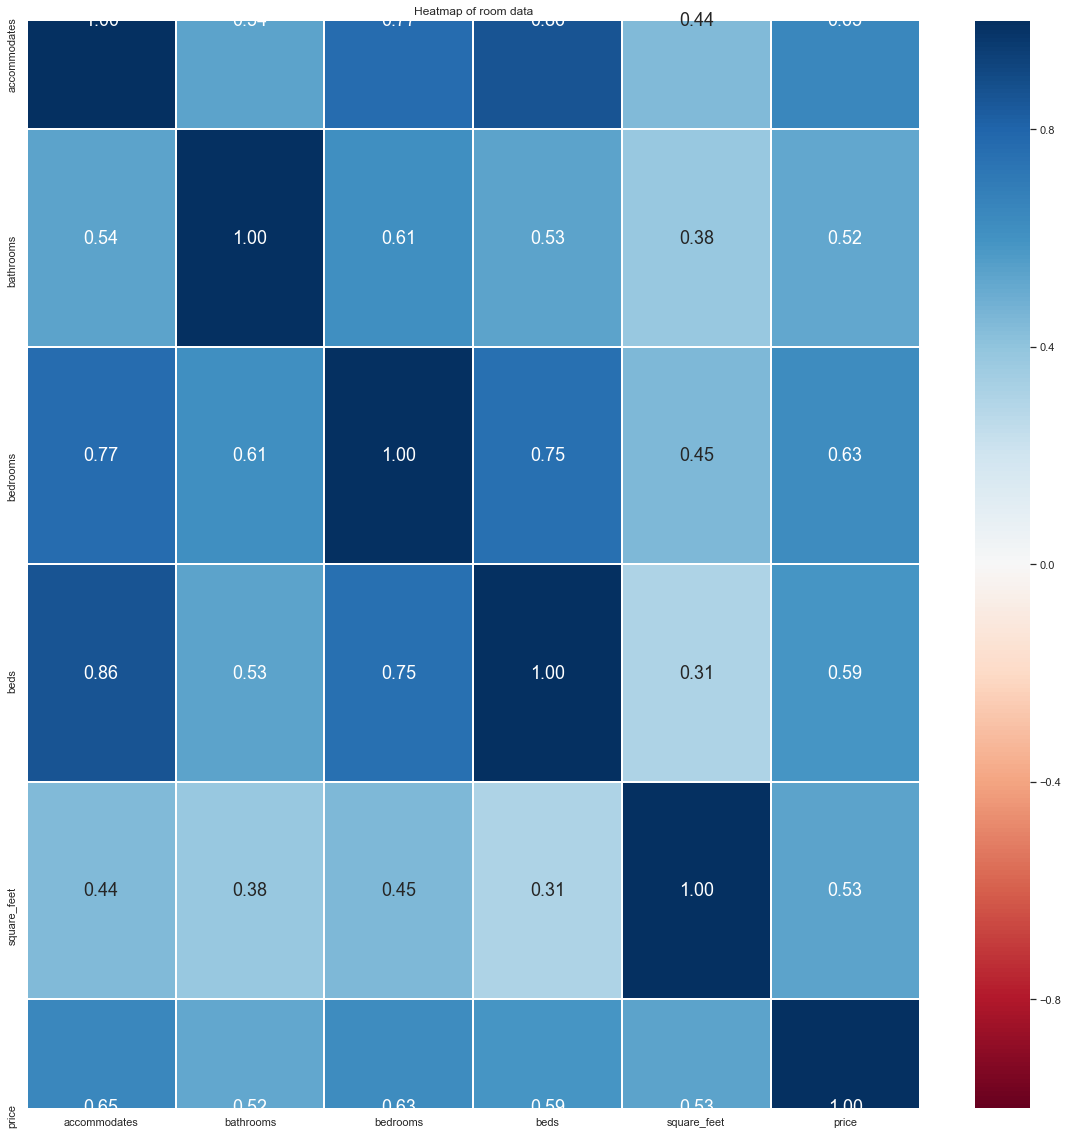

In [53]:
print(room_data_numeric.corr())
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(room_data_numeric.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu").set_title("Heatmap of room data")
plt.show()

The data shows that the highest correlation with price is how many people the room accomodates with a correlation of 0.652. Therefore, there is a high probability that using the number of rooms will be a good predictor of price. We then proceed to conduct linear regression to assess its viability.

In [54]:
room_data_numeric.head()

,accommodates,bathrooms,bedrooms,beds,square_feet,price
0,4,1.0,1.0,1.0,NaN,85.0
1,4,1.0,1.0,1.0,NaN,150.0
2,11,4.5,5.0,7.0,NaN,975.0
3,3,1.0,0.0,2.0,NaN,100.0
4,6,2.0,3.0,3.0,NaN,450.0


Intercept of Regression 	: b =  [28.61300926]
Coefficients of Regression 	: a =  [[29.7408746]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.41778719453636554
Mean Squared Error (MSE) 	: 4952.925363954153

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.45253018452090105
Mean Squared Error (MSE) 	: 3858.158544863709



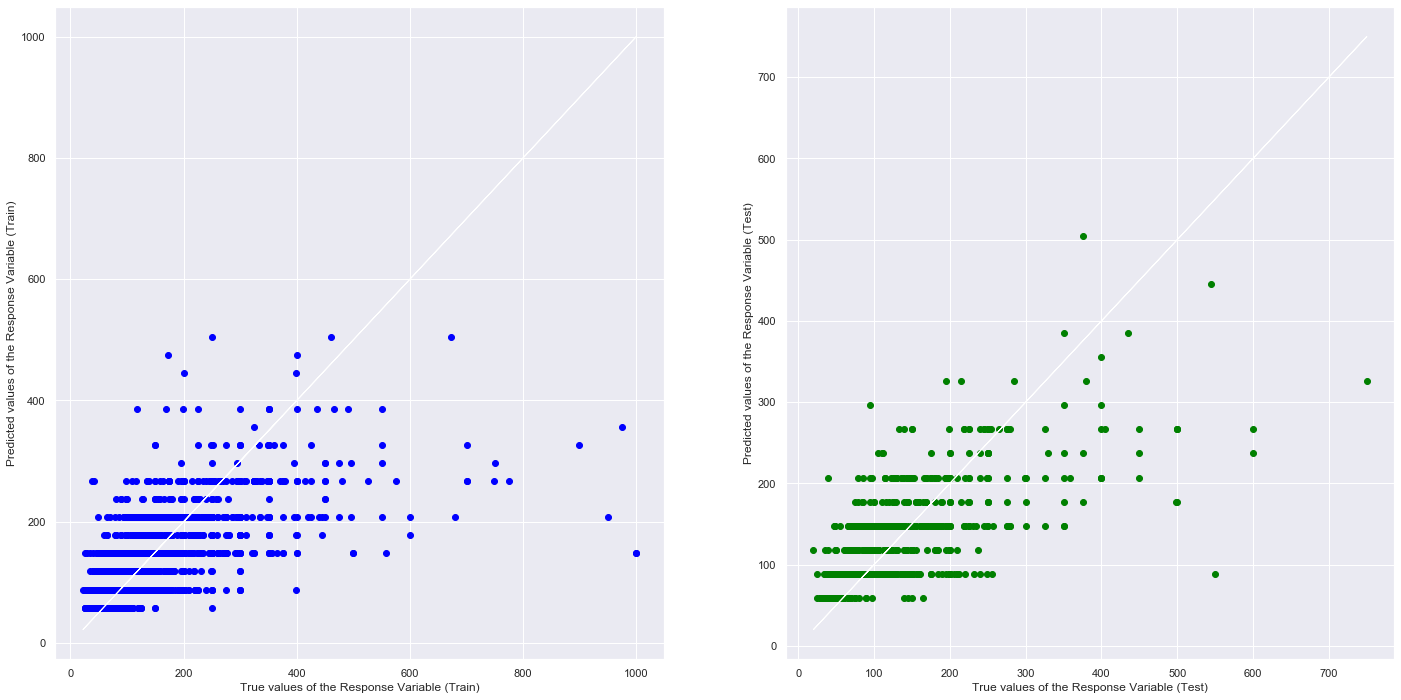

In [55]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


accommodation = pd.DataFrame(room_data_numeric["accommodates"])   # Predictor
price = pd.DataFrame(room_data["price"])         # Response

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(accommodation, price, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

We can see that the number of people a room accommodates can predict the price of the property to a small extent. The validity is assessed throught the R^2 value which is 0.423 on the train set and 0.427 on the test set. 

# Host description to determine pricing

One of the hypotheses is that the host might have played a significant part in writing the desciption and summary of the posting. Therefore, in this portion, we analyse the sentiment on the desciption of the apartment using the natural language processing library, ntlk.

We first extract the characteristics where the host fill out. 

In [56]:
sentiment_analysis_data=pd.DataFrame( listings_data[['summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit']])

In [57]:
sentiment_analysis_data.head()

,summary,space,description,experiences_offered,neighborhood_overview,notes,transit
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ..."
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN
4,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...


As seen above, the experiences offered has a string none, we then replace it with NaN. 

In [58]:
sentiment_analysis_data["experiences_offered"]=sentiment_analysis_data["experiences_offered"].replace("none",np.NaN)

In [59]:
sentiment_analysis_data.head()

,summary,space,description,experiences_offered,neighborhood_overview,notes,transit
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,NaN,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ..."
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,NaN,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,NaN
4,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,NaN,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...


Then we look at the data types. 

In [60]:
sentiment_analysis_data.dtypes

summary                   object
space                     object
description               object
experiences_offered      float64
neighborhood_overview     object
notes                     object
transit                   object
dtype: object

In [61]:
for items in sentiment_analysis_data.columns[1:8]:
    print(items)

space
description
experiences_offered
neighborhood_overview
notes
transit


In [62]:
for items in sentiment_analysis_data:
    sentiment_analysis_data[items] = sentiment_analysis_data[items].astype("str")
sentiment_analysis_data.dtypes

summary                  object
space                    object
description              object
experiences_offered      object
neighborhood_overview    object
notes                    object
transit                  object
dtype: object

In [63]:
sentiment_analysis_data.head()

,summary,space,description,experiences_offered,neighborhood_overview,notes,transit
0,nan,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,nan,nan,nan,nan
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,nan,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ..."
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,nan,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...
3,A charming apartment that sits atop Queen Anne...,nan,A charming apartment that sits atop Queen Anne...,nan,nan,nan,nan
4,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,nan,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...


In this portion, we first remove clean the data before it is scored from a scale of -1 to 1 with the sentiment indicating 1 the most positive and -1 as the most negative. The below code shows the implementation. 

In [64]:
stop=stopwords.words("english")
sid= SentimentIntensityAnalyzer()
clean_sentiment_analysis_data=pd.DataFrame()
for items in sentiment_analysis_data:
    sentiment_analysis_data[items]=sentiment_analysis_data[items].str.replace("\W"," ") #removing symbols
    sentiment_analysis_data[items]=sentiment_analysis_data[items].str.lower()  #making words small cap
    sentiment_analysis_data[items]=sentiment_analysis_data[items].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) #removing non-english words   
    name=str(items)+" score"
    clean_sentiment_analysis_data[name]=sentiment_analysis_data[items].apply(sid.polarity_scores)
    clean_sentiment_analysis_data[name]=[d.get('compound') for d in clean_sentiment_analysis_data[name]]
clean_sentiment_analysis_data.head()

,summary score,space score,description score,experiences_offered score,neighborhood_overview score,notes score,transit score
0,0.0000,0.9468,0.9468,0.0,0.0000,0.000,0.0000
1,-0.2263,0.9961,0.9939,0.0,0.8625,0.969,-0.5423
2,0.7425,0.9360,0.9665,0.0,0.9552,-0.250,-0.3400
3,0.8555,0.0000,0.8555,0.0,0.0000,0.000,0.0000
4,0.8225,0.8885,0.9638,0.0,0.9186,0.000,-0.2263


In [65]:
clean_sentiment_analysis_data["total sentiment score"]=clean_sentiment_analysis_data.sum(axis=1)

To get the overall sentiment across the columns, we sum up the scores. 

In [66]:
clean_sentiment_analysis_data

,summary score,space score,description score,experiences_offered score,neighborhood_overview score,notes score,transit score,total sentiment score
0,0.0000,0.9468,0.9468,0.0,0.0000,0.0000,0.0000,1.8936
1,-0.2263,0.9961,0.9939,0.0,0.8625,0.9690,-0.5423,3.0529
2,0.7425,0.9360,0.9665,0.0,0.9552,-0.2500,-0.3400,3.0102
3,0.8555,0.0000,0.8555,0.0,0.0000,0.0000,0.0000,1.7110
4,0.8225,0.8885,0.9638,0.0,0.9186,0.0000,-0.2263,3.3671
...,...,...,...,...,...,...,...,...
3813,0.0000,0.9882,0.9842,0.0,0.6705,0.0000,0.0000,2.6429
3814,0.5574,0.7003,0.8214,0.0,0.0000,0.2023,0.0972,2.3786
3815,0.9118,0.0000,0.9118,0.0,0.0000,0.0000,0.0000,1.8236
3816,0.8271,0.9413,0.9735,0.0,0.4939,0.0000,0.4019,3.6377


In [67]:
clean_sentiment_analysis_data["id"]=listings_data["id"]
clean_sentiment_analysis_data["price"]=listings_data["price"]

In [68]:
clean_sentiment_analysis_data.head()

,summary score,space score,description score,experiences_offered score,neighborhood_overview score,notes score,transit score,total sentiment score,id,price
0,0.0000,0.9468,0.9468,0.0,0.0000,0.000,0.0000,1.8936,241032,85.0
1,-0.2263,0.9961,0.9939,0.0,0.8625,0.969,-0.5423,3.0529,953595,150.0
2,0.7425,0.9360,0.9665,0.0,0.9552,-0.250,-0.3400,3.0102,3308979,975.0
3,0.8555,0.0000,0.8555,0.0,0.0000,0.000,0.0000,1.7110,7421966,100.0
4,0.8225,0.8885,0.9638,0.0,0.9186,0.000,-0.2263,3.3671,278830,450.0


In [69]:
clean_sentiment_analysis_data.columns

Index(['summary score', 'space score', 'description score',
       'experiences_offered score', 'neighborhood_overview score',
       'notes score', 'transit score', 'total sentiment score', 'id', 'price'],
      dtype='object')

In [70]:
clean_sentiment_analysis_data=clean_sentiment_analysis_data.drop(columns=['summary score', 'space score', 'description score',
       'experiences_offered score', 'neighborhood_overview score',
       'notes score', 'transit score'])

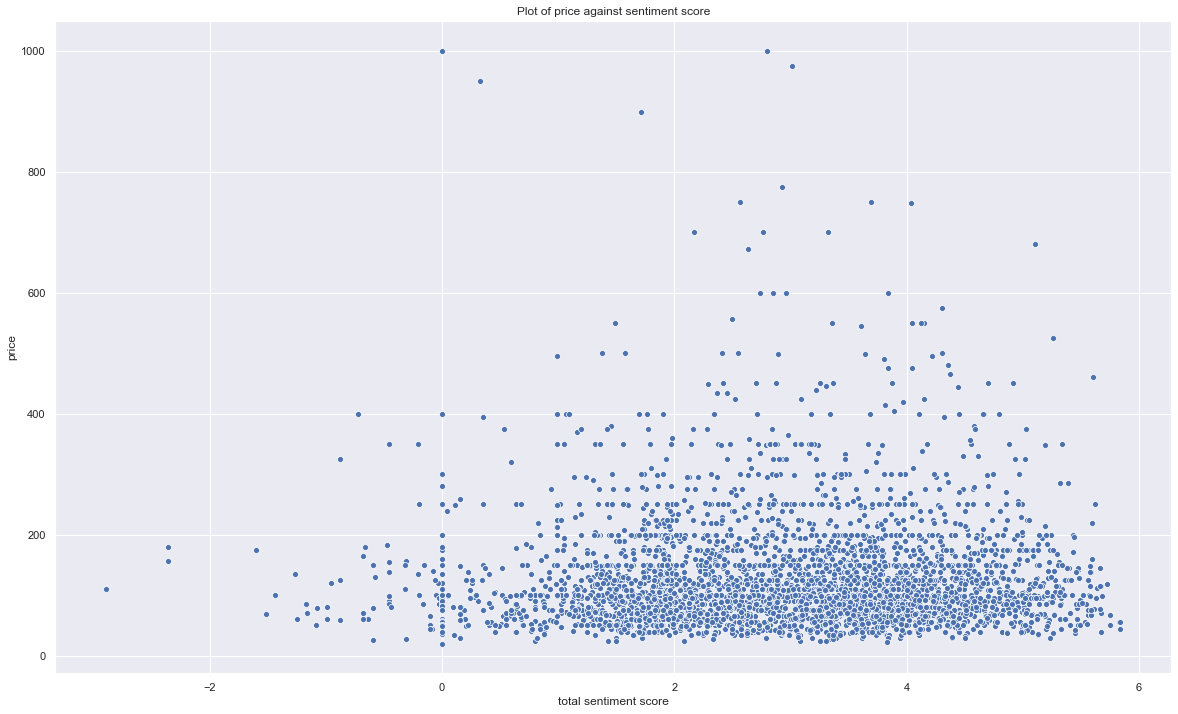

In [71]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.scatterplot(x="total sentiment score",y="price",data=clean_sentiment_analysis_data,ax=axes).set_title("Plot of price against sentiment score")
plt.show()

Intercept of Regression 	: b =  [2.9600186]
Coefficients of Regression 	: a =  [[-2.18536071e-05]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 2.2685404147404498e-06
Mean Squared Error (MSE) 	: 1.7526409766755484

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0012494221180963105
Mean Squared Error (MSE) 	: 1.6673890095900719



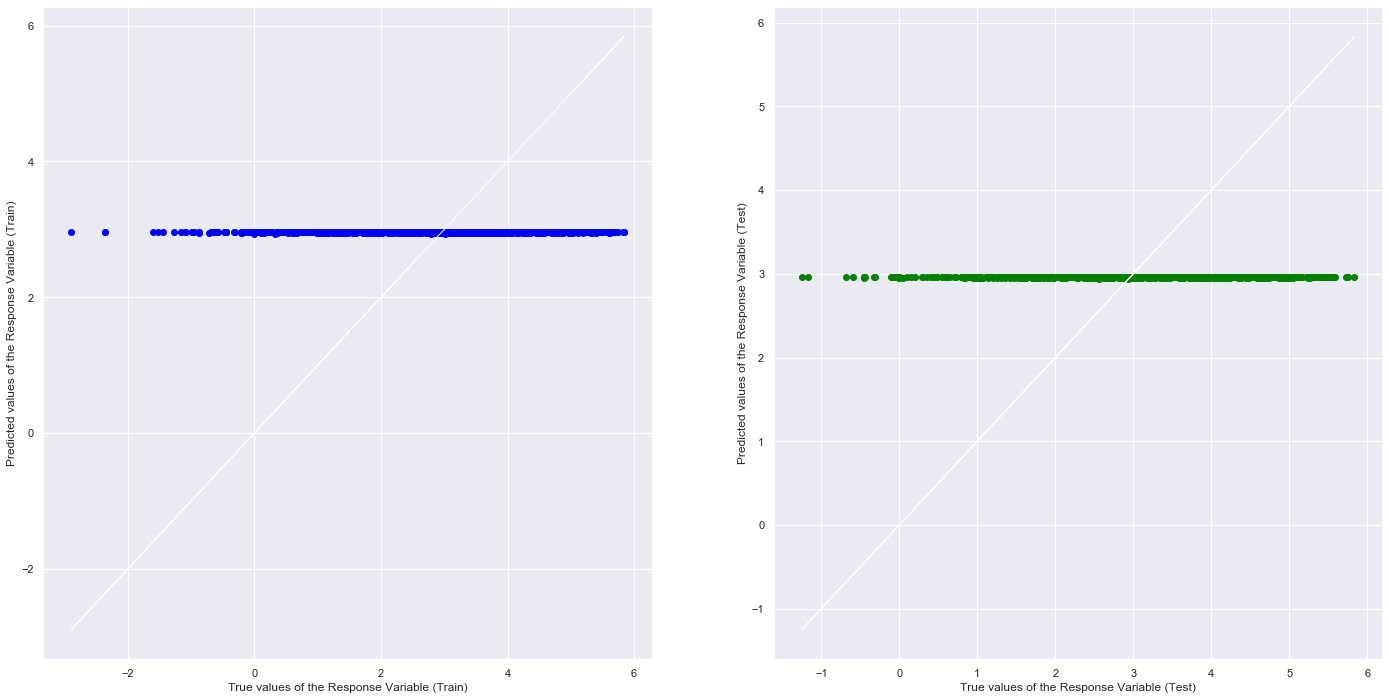

In [72]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

total = pd.DataFrame(clean_sentiment_analysis_data["price"])   # Predictor
price = pd.DataFrame(clean_sentiment_analysis_data["total sentiment score"])         # Response


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, price, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

We see that summing up the sentiment has no predictive capability in the regression model with low R^2 values for both the train and test set.

# Wordcloud

In this portion, we see what are the most commonly used words and the key points the hosts are trying to send out when conveying information to the consumers. We use the library WordCloud. This is visualised by the size of the words, the bigger the size, the more commonly used the words are. 

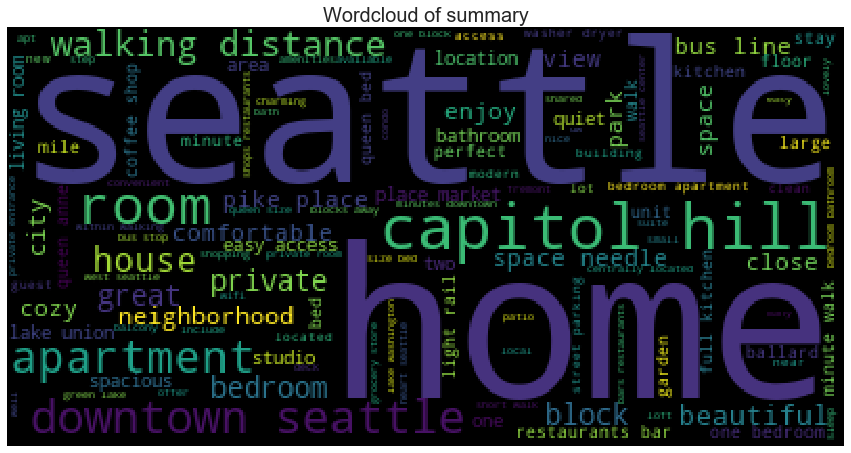

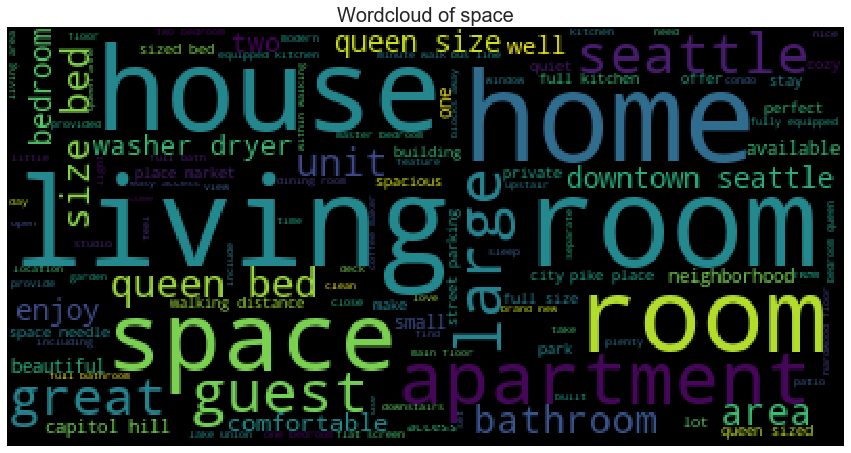

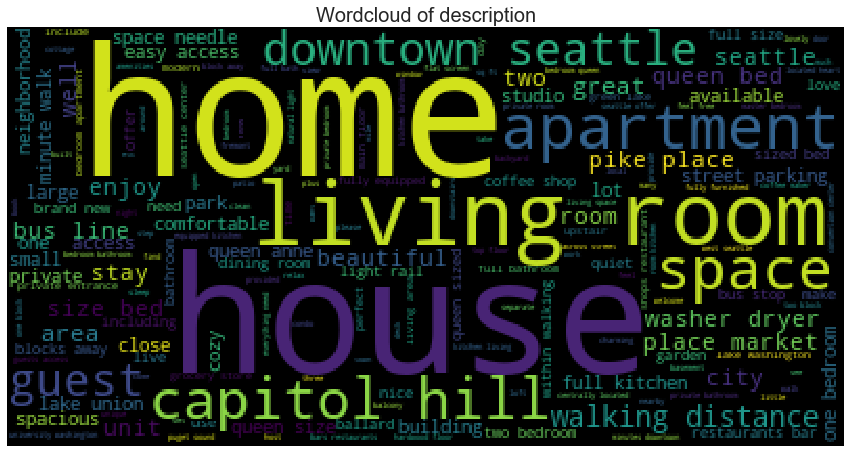

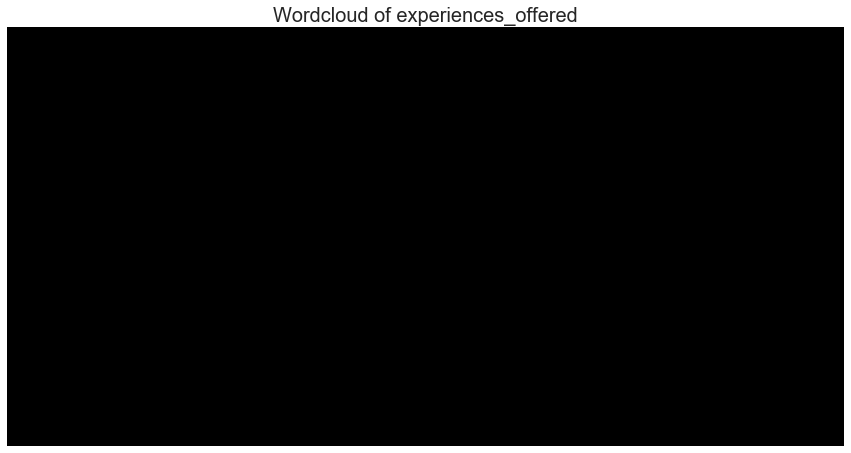

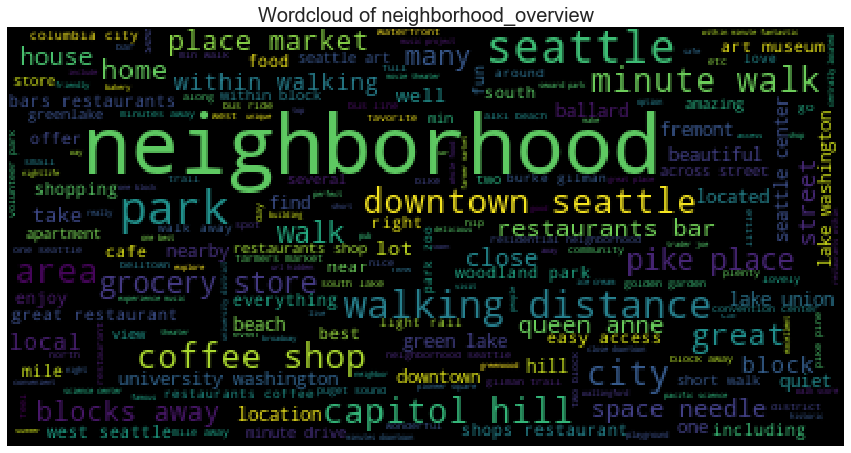

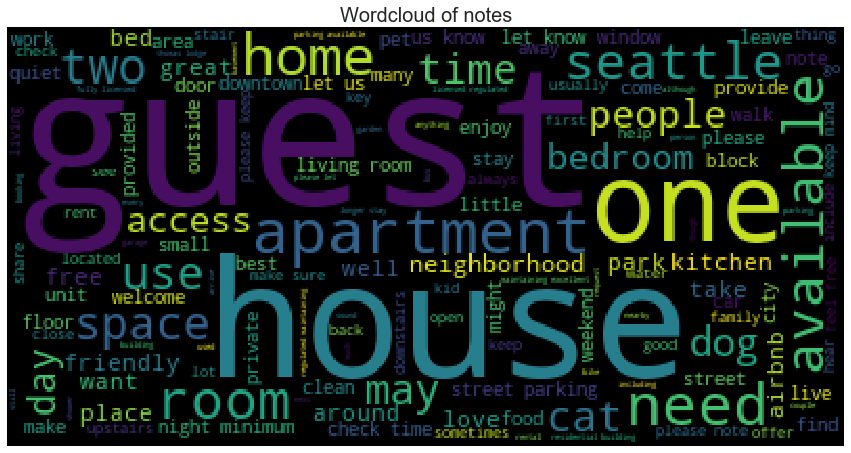

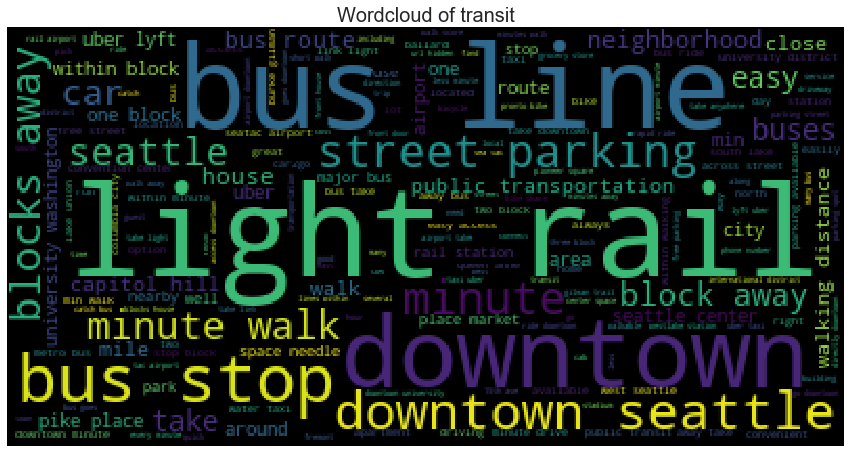

In [73]:
for i in sentiment_analysis_data:
    wordcloud=sentiment_analysis_data.copy()
    wordcloudtweet=wordcloud[i]
    wordcloudtweet=wordcloudtweet.tolist()
    wordcloudlist=[]
    for items in wordcloudtweet:
        wordcloudlist.append(items)

    long_str_descriptions = ''
    for tweets in wordcloudlist:
        long_str_descriptions+=tweets
    long_str_descriptions

    plt.figure(figsize=(15,8))
    desc_wordcloud = WordCloud(
        width=400, height=200,
        background_color="black", 
        max_words=300, relative_scaling = 1.0).generate(long_str_descriptions)
    plt.imshow(desc_wordcloud)
    plt.axis("off")
    plt.title("Wordcloud of "+ str(i), fontsize=20)
    plt.show()

## Comparing Total Reviews of Listings

First, count total number of reviews

In [74]:
countreviews = reviews_data.groupby('listing_id')['listing_id'].count().reset_index(name='totalreviews')
countreviews

,listing_id,totalreviews
0,4291,35
1,5682,297
2,6606,52
3,7369,40
4,9419,79
...,...,...
3186,9995551,1
3187,10012724,2
3188,10020221,1
3189,10118341,1


In [75]:
countreviews.describe()

,listing_id,totalreviews
count,3.191000e+03,3191.000000
mean,5.024827e+06,26.590097
std,2.802502e+06,39.840788
min,4.291000e+03,1.000000
25%,2.712948e+06,4.000000
50%,5.308339e+06,13.000000
75%,7.467034e+06,31.000000
max,1.024814e+07,474.000000


Rename id column for merging compatibility

In [76]:
listingid = listings_data.rename(columns={'id':'listing_id'})
listingid

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


Combine total reviews and listing id

In [77]:
combrevlist = pd.merge(listingid, countreviews, on='listing_id', how='left')
combrevlist

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,totalreviews
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,207.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,43.0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,20.0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,f,NaN,WASHINGTON,f,strict,f,f,8,0.30,1.0
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00,2.0
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN,NaN


In [78]:
for i in combrevlist:
    per_area = combrevlist["price"]/combrevlist["beds"]
    combrevlist["Price Per Bed"] = per_area

In [79]:
idrevprice = combrevlist[['listing_id', 'price', 'Price Per Bed', 'totalreviews']].dropna()
idrevprice

,listing_id,price,Price Per Bed,totalreviews
0,241032,85.0,85.000000,207.0
1,953595,150.0,150.000000,43.0
2,3308979,975.0,139.285714,20.0
4,278830,450.0,150.000000,38.0
5,5956968,120.0,120.000000,17.0
...,...,...,...,...
3810,262764,154.0,51.333333,5.0
3811,8578490,65.0,65.000000,2.0
3812,3383329,95.0,47.500000,73.0
3813,8101950,359.0,119.666667,1.0


Plot price against number of total reviews

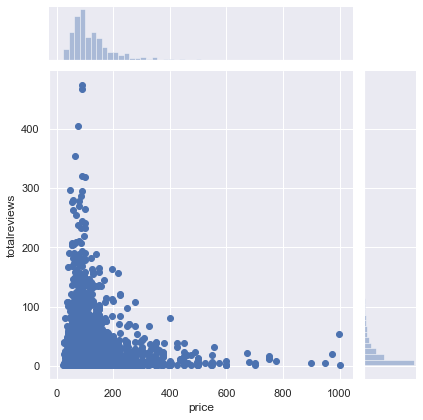

In [80]:
revpriceplot = sb.jointplot("price", "totalreviews", data=idrevprice)

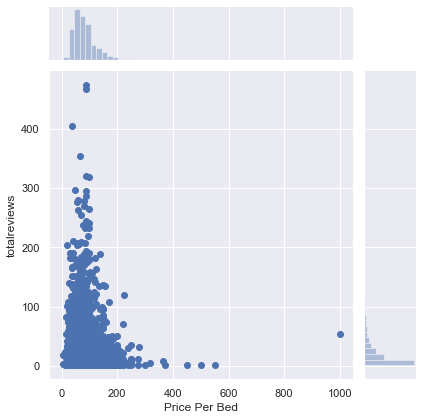

In [81]:
revpriceperbedplot = sb.jointplot("Price Per Bed", "totalreviews", data=idrevprice)

In [82]:
idrevprice

,listing_id,price,Price Per Bed,totalreviews
0,241032,85.0,85.000000,207.0
1,953595,150.0,150.000000,43.0
2,3308979,975.0,139.285714,20.0
4,278830,450.0,150.000000,38.0
5,5956968,120.0,120.000000,17.0
...,...,...,...,...
3810,262764,154.0,51.333333,5.0
3811,8578490,65.0,65.000000,2.0
3812,3383329,95.0,47.500000,73.0
3813,8101950,359.0,119.666667,1.0


In [83]:
location_data=location_data.rename(columns={"id":"listing_id"})

In [84]:
location_data_with_reviews=pd.merge(idrevprice, location_data,how="left", on = "listing_id")
location_data_with_reviews.head()

,listing_id,price,Price Per Bed,totalreviews,latitude,longitude
0,241032,85.0,85.000000,207.0,47.636289,-122.371025
1,953595,150.0,150.000000,43.0,47.639123,-122.365666
2,3308979,975.0,139.285714,20.0,47.629724,-122.369483
3,278830,450.0,150.000000,38.0,47.632918,-122.372471
4,5956968,120.0,120.000000,17.0,47.630525,-122.366174


In [85]:
cond1= location_data_with_reviews["totalreviews"]>100
visualise_listings(location_data_with_reviews[cond1])
mplleaflet.show()

Check correlation matrix

                  price  Price Per Bed  totalreviews
price          1.000000       0.499884     -0.134951
Price Per Bed  0.499884       1.000000     -0.048279
totalreviews  -0.134951      -0.048279      1.000000


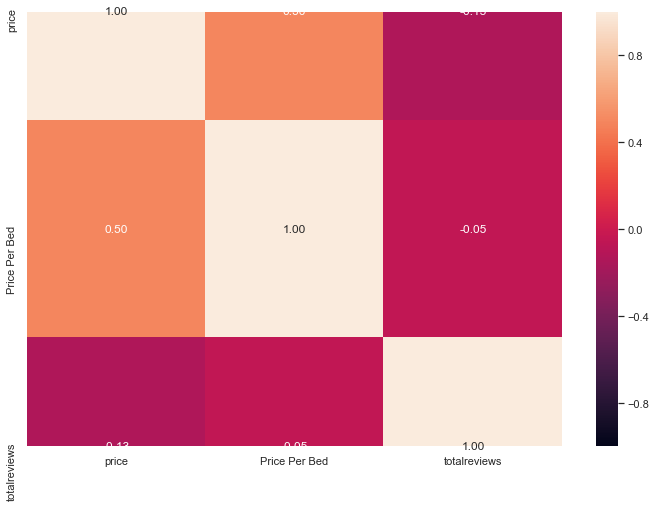

In [86]:
# Correlation Matrix
print(idrevprice[['price', 'Price Per Bed', 'totalreviews']].corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(idrevprice[['price', 'Price Per Bed', 'totalreviews']].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

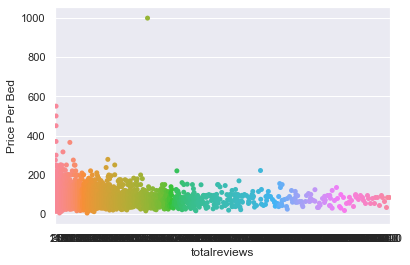

In [87]:
sb.swarmplot("totalreviews", "Price Per Bed", data=idrevprice)

#### Insights on total reviews<br>
The first assumption is that the number of reviews roughly depicts the number of people that have stayed at the listing. <br><br>
From these graphs, mathematically there is weak correlation of price to number of reviews as this is not a linear relationship, in other words, increasing the price does not increase number of people that want to stay, which is logical from a financially feasibility point of view. <br><br>
However, by visual analysis, it shows that there is a sweet spot of pricing at about \\$100 per bed. These listings will more likely to have more reviews, which means more likely to get booked as customers find this is the most reasonably priced range. However, there is no guarantee, as there are many other listings within this price range that have very low review count also, it only increases the probability of getting bookings. This price bracket may be checked with other variables to find more correlations. <br><br>
Listings that go above the \\$200 per bed range experience a sharp drop in the number of total reviews as people are less willing to pay higher prices. <br><br>
There is an exception with one particular listing which stands out as an anomaly, which is the one that costs \\$1000 per bed and yet has more reviews than those in the \\$250-\\$600 range. This might be due to its exclusivity and being known to be the most expensive listing in the area, which attracts some extremely rich people for the prestige or couples that want to splurge on a honeymoon.